C:\Users\lenovo\AppData\Local\Temp\ipykernel_13036\4111559820.py:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


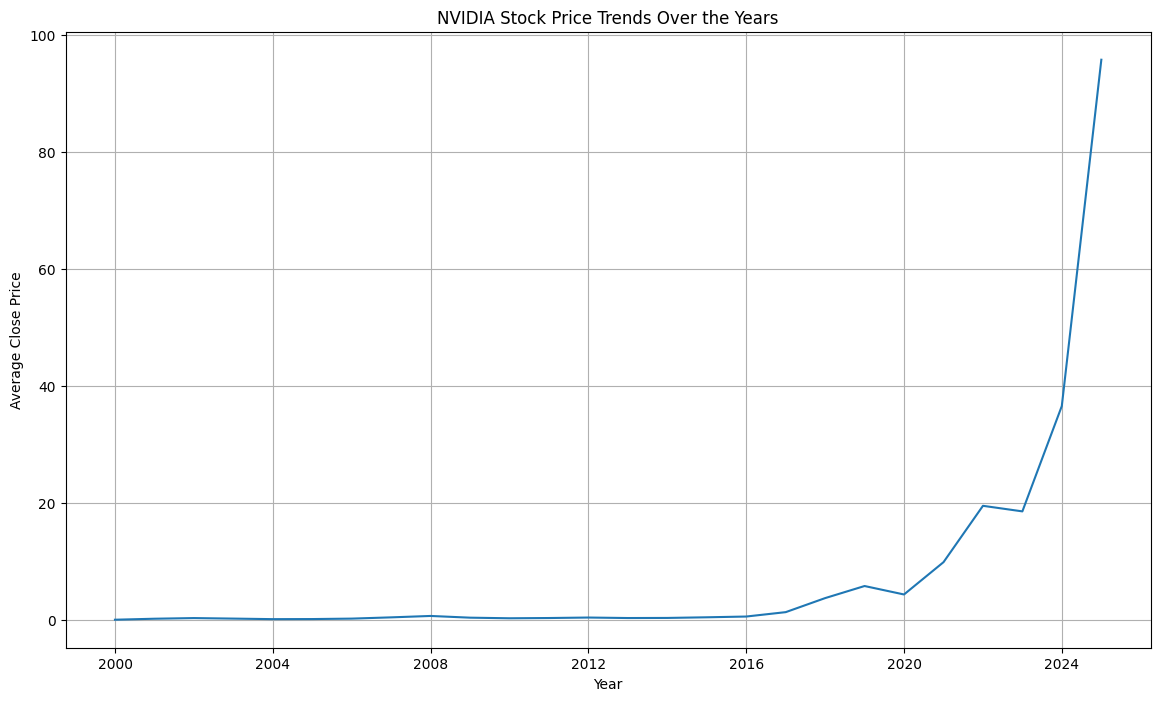

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

# Register matplotlib converters (optional for some environments)
register_matplotlib_converters()

# Load the NVIDIA dataset
data = pd.read_csv('C:/Users/lenovo/Downloads/archive (2)/NVIDIA/NvidiaStockPrice.csv')

# Convert 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Resample data to yearly frequency and take mean of 'Close' prices
yearly_data = data['Close'].resample('Y').mean().reset_index(name='Close')

# Prepare data for plotting
trend_data = yearly_data.pivot_table(index='Date', values='Close')

# Plotting the trends over time for the 'Close' price
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_data, x='Date', y='Close')
plt.title('NVIDIA Stock Price Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.show()


In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Load the dataset
nvidia_df = pd.read_csv('C:/Users/lenovo/Downloads/archive (2)/NVIDIA/NvidiaStockPrice.csv')

# Convert the 'Date' column to datetime format
nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'])

# Set the 'Date' column as index
nvidia_df.set_index('Date', inplace=True)

# Select 'Adj Close' for analysis
nvidia_series = nvidia_df['Adj Close'].dropna()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_13036\4193378469.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'])


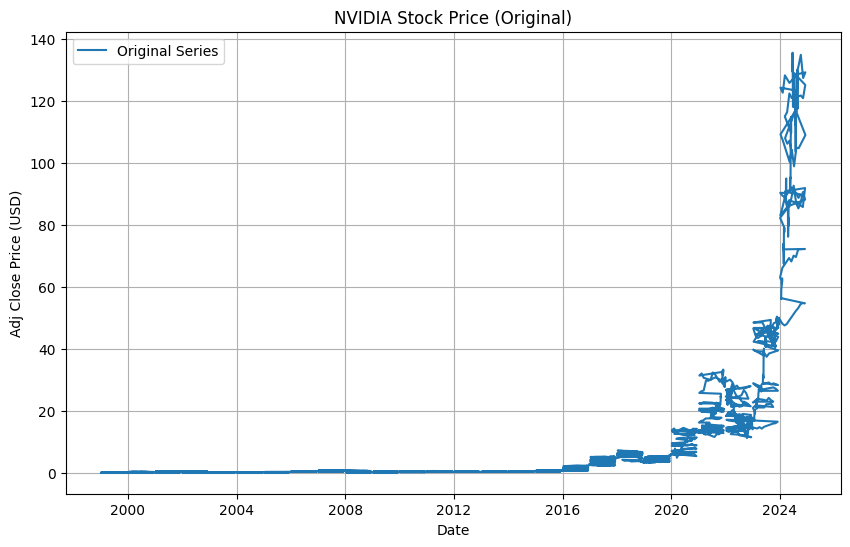

In [21]:

# Plot the original series
plt.figure(figsize=(10, 6))
plt.plot(nvidia_series, label='Original Series')
plt.title('NVIDIA Stock Price (Original)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


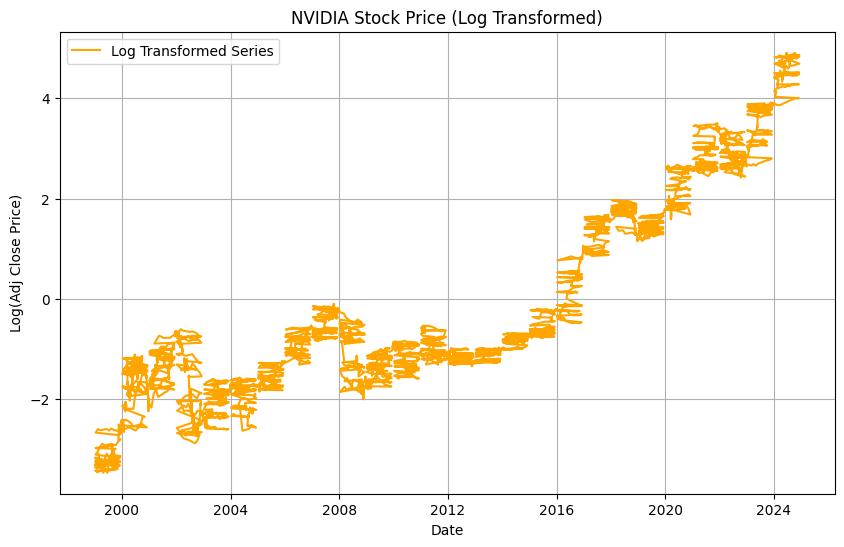

In [22]:

# Perform Log Transformation to stabilize variance
nvidia_log = np.log(nvidia_series)

# Plot the log-transformed series
plt.figure(figsize=(10, 6))
plt.plot(nvidia_log, label='Log Transformed Series', color='orange')
plt.title('NVIDIA Stock Price (Log Transformed)')
plt.xlabel('Date')
plt.ylabel('Log(Adj Close Price)')
plt.legend()
plt.grid(True)
plt.show()


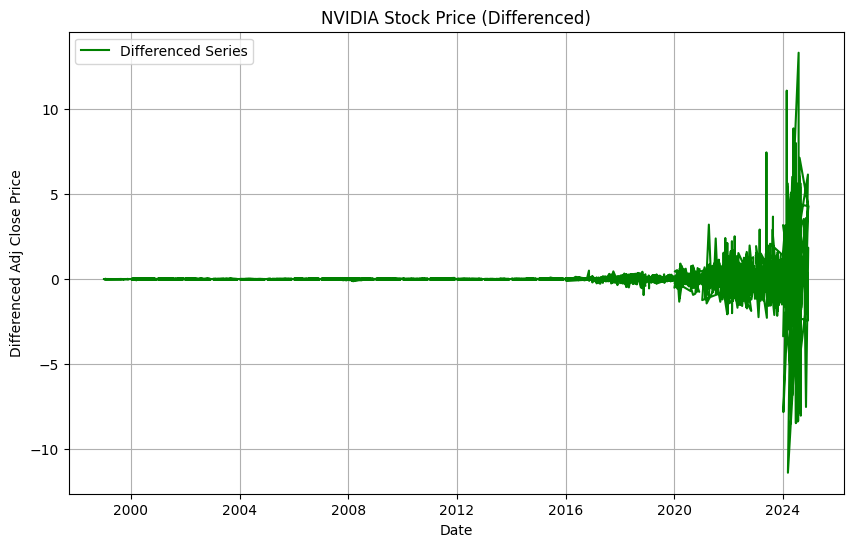

In [23]:

# Differencing to remove trend (regular differencing)
nvidia_diff = nvidia_series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(nvidia_diff, label='Differenced Series', color='green')
plt.title('NVIDIA Stock Price (Differenced)')
plt.xlabel('Date')
plt.ylabel('Differenced Adj Close Price')
plt.legend()
plt.grid(True)
plt.show()


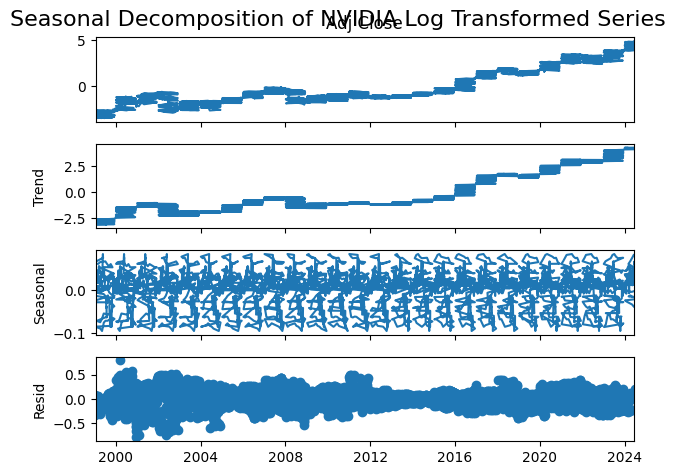

In [24]:

# Seasonal decomposition (additive model)
decomposition = seasonal_decompose(nvidia_log, model='additive', period=252)  # Assuming 252 trading days per year

# Plot the decomposed components
decomposition.plot()
plt.suptitle('Seasonal Decomposition of NVIDIA Log Transformed Series', fontsize=16)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13036\2967631941.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\lenovo\.conda\envs\keras_env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


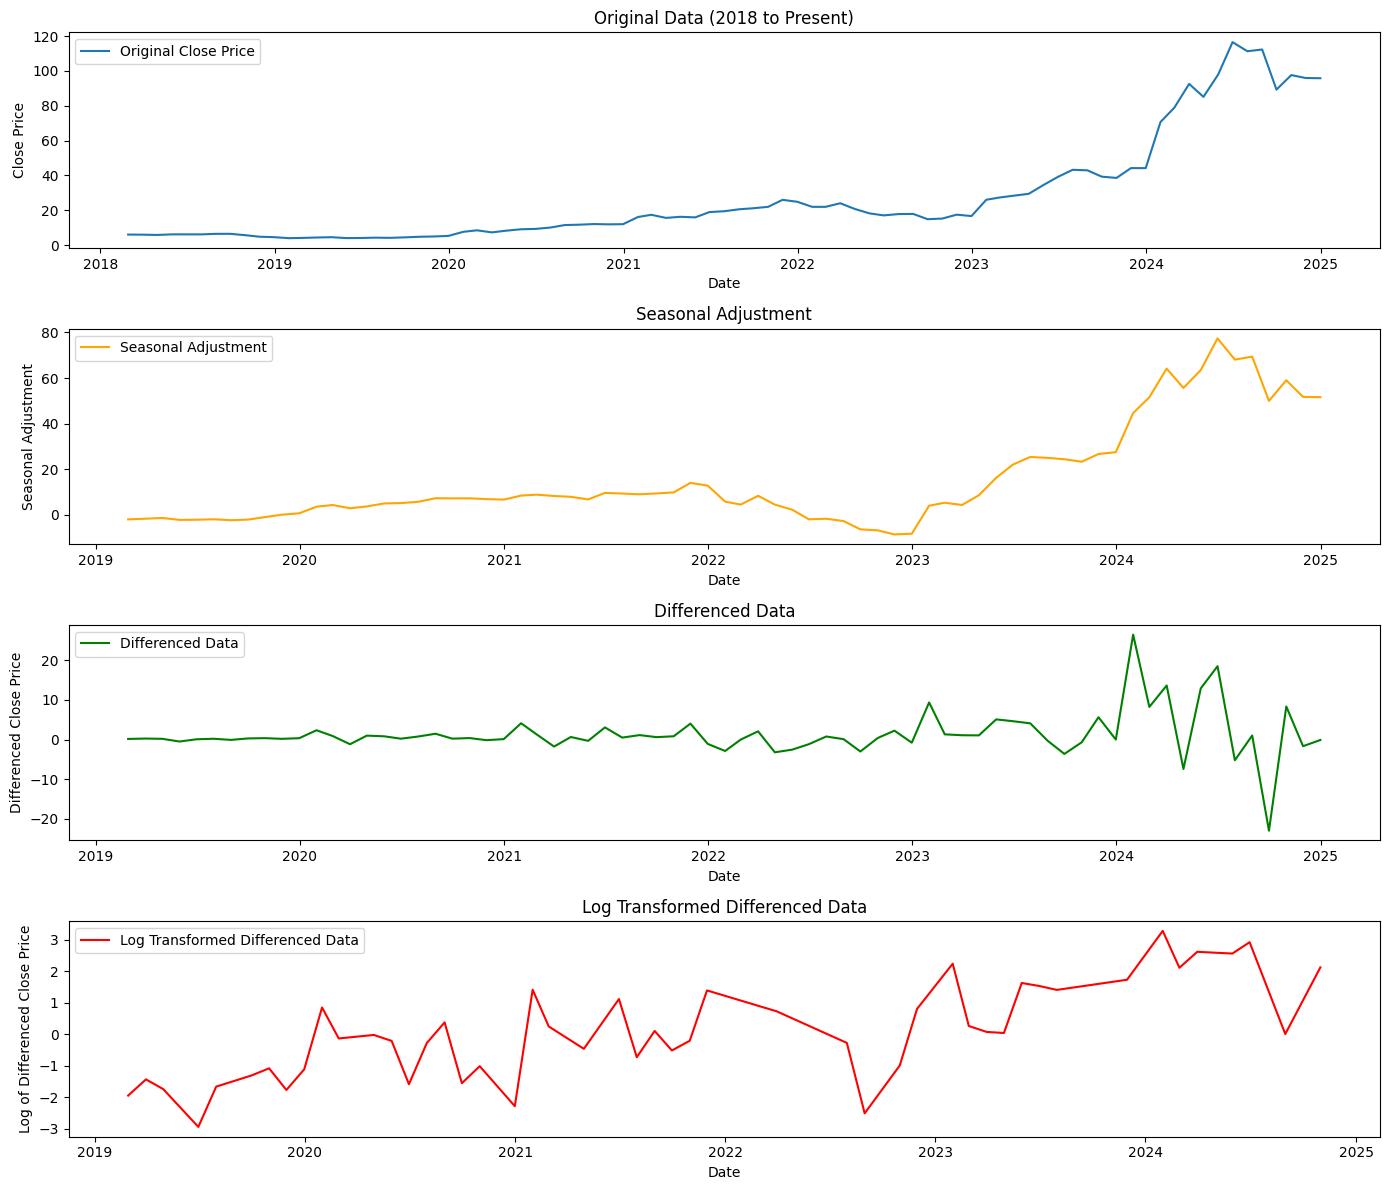

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the NVIDIA dataset
data = pd.read_csv('C:/Users/lenovo/Downloads/archive (2)/NVIDIA/NvidiaStockPrice.csv')

# Convert 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Filter data from 2018 to the current date
start_date = '02-01-2018'
end_date = pd.to_datetime('06-09-2024')  # Or specify a different end date
data_filtered = data.loc[start_date:end_date]

# Resample data to monthly frequency and take mean of 'Close' prices
data_monthly = data_filtered['Close'].resample('M').mean().reset_index(name='Close')

# Create a new column for differencing
data_monthly['diff'] = data_monthly['Close'].diff(periods=1)
data_monthly = data_monthly.dropna()  # Drop NaN values resulting from differencing

# Plot Original 'Close' prices
plt.figure(figsize=(14, 12))

# Plot Original 'Close' prices
plt.subplot(4, 1, 1)
plt.plot(data_monthly['Date'], data_monthly['Close'], label='Original Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original Data (2018 to Present)')
plt.legend(loc='upper left')

# Seasonal Adjustment
data_monthly['SeasonalAdjustment'] = data_monthly['Close'] - data_monthly['Close'].shift(12)
data_monthly = data_monthly.dropna()  # Drop NaN values resulting from seasonal adjustment
plt.subplot(4, 1, 2)
plt.plot(data_monthly['Date'], data_monthly['SeasonalAdjustment'], label='Seasonal Adjustment', color='orange')
plt.xlabel('Date')
plt.ylabel('Seasonal Adjustment')
plt.title('Seasonal Adjustment')
plt.legend(loc='upper left')

# Plot Differenced Data
plt.subplot(4, 1, 3)
plt.plot(data_monthly['Date'], data_monthly['diff'], label='Differenced Data', color='green')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.title('Differenced Data')
plt.legend(loc='upper left')

# Log Transformation of Differenced Data
data_monthly['log'] = np.log(data_monthly['diff'].replace(0, np.nan))  # Avoid log(0)
data_monthly = data_monthly.dropna()  # Drop NaN values resulting from log transformation
plt.subplot(4, 1, 4)
plt.plot(data_monthly['Date'], data_monthly['log'], label='Log Transformed Differenced Data', color='red')
plt.xlabel('Date')
plt.ylabel('Log of Differenced Close Price')
plt.title('Log Transformed Differenced Data')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
